# Exploratory data analysis

## Imports

In [1]:
import scipy
import numpy as np
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics import tsaplots

from utils import PROCESSED_DATA_DIR

pl.Config.set_tbl_rows(20)

polars.config.Config

## Data loading

In [2]:
processed_df = pl.read_parquet(
    PROCESSED_DATA_DIR.joinpath('training', 'train_full.parquet')
)

processed_df

carrier,flt_num,flt_departure_dt,observation_date,total_fare,days_till_flight,is_dst,route_id,flt_departure_local_time,flt_arrival_local_time,dur_min,tz_min,over_mn,dpt_4h_od,flt_count_dpt_24h,flt_count_dpt_4h,scaled_demand,scaled_share,origin_id,destination_id,flt_info_null
str,i64,date,date,i64,i16,i8,u8,datetime[ns],datetime[ns],i16,i16,i8,i8,u8,u8,i64,i64,u8,u8,u8
"""U1""",6143,2018-01-01,2017-11-27,469,35,0,11,null,null,null,null,null,null,null,null,null,null,7,3,1
"""L1""",5927,2018-01-01,2017-11-27,1119,35,0,1,2018-01-01 20:33:00,2018-01-01 23:50:00,197,-300,0,5,5,1,1468,360,1,5,0
"""L3""",18075,2018-01-01,2017-11-27,422,35,0,6,2018-01-01 13:20:00,2018-01-01 14:35:00,75,-480,0,3,30,9,6659,228,4,3,0
"""OTH""",2416,2018-01-01,2017-11-27,787,35,0,4,2018-01-01 20:22:00,2018-01-01 21:46:00,84,-480,0,5,30,4,6659,316,3,4,0
"""L3""",18270,2018-01-01,2017-11-27,1298,35,0,4,2018-01-01 11:17:00,2018-01-01 12:40:00,83,-480,0,2,30,5,6659,231,3,4,0
"""L1""",1396,2018-01-01,2017-11-27,372,35,0,11,2018-01-01 19:35:00,2018-01-01 21:08:00,93,-480,0,4,21,7,6579,262,7,3,0
"""U1""",4771,2018-01-01,2017-11-27,513,35,0,4,null,null,null,null,null,null,null,null,null,null,3,4,1
"""OTH""",4825,2018-01-01,2017-11-27,432,35,0,6,2018-01-01 12:55:00,2018-01-01 14:07:00,72,-480,0,3,30,9,6659,316,4,3,0
"""OTH""",6175,2018-01-01,2017-11-27,341,35,0,11,2018-01-01 18:55:00,2018-01-01 20:23:00,88,-480,0,4,21,7,6579,354,7,3,0


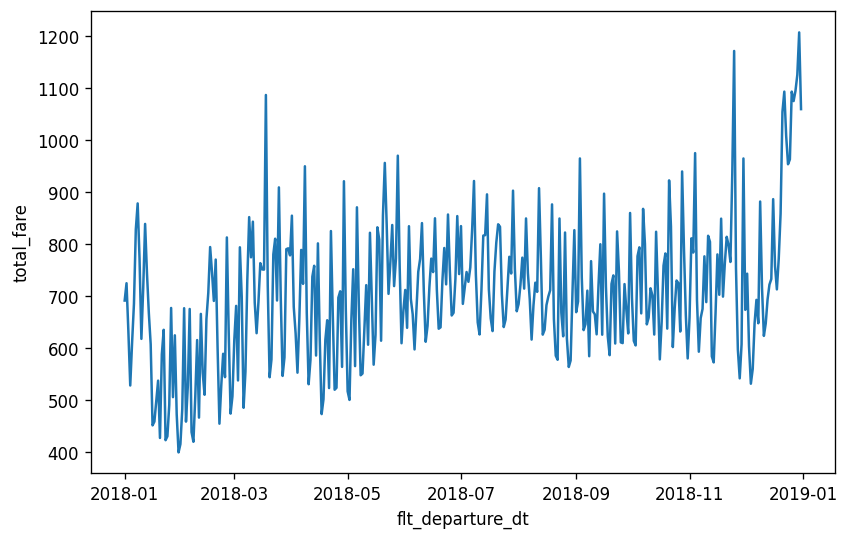

In [3]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.lineplot(
    data = processed_df.group_by('flt_departure_dt').agg(pl.col('total_fare').mean()), 
    x = "flt_departure_dt", 
    y = "total_fare"
)

plt.show()

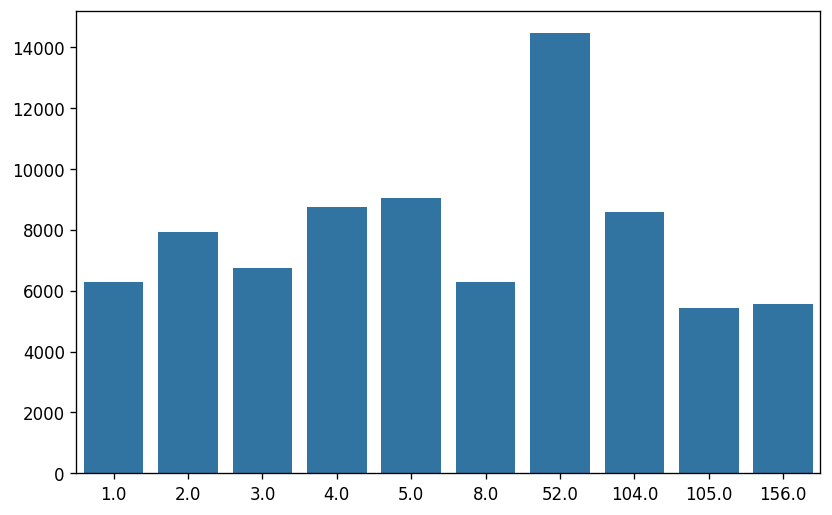

In [4]:
def get_top_frequencies(signal, freq_count = 10):
    signal = signal - signal.mean()

    rfft = np.abs(
        scipy.fft.rfft(signal)
    )
    rfft_freq = scipy.fft.rfftfreq(signal.size, 1 / signal.size)

    top_freq = rfft.argsort()[-freq_count::][::-1]

    return rfft[top_freq], rfft_freq[top_freq]

daily_mean_prices = processed_df.group_by('flt_departure_dt').agg(
    pl.col('total_fare').mean()
).sort('flt_departure_dt')['total_fare'].to_numpy()

rfft, rfft_freq = get_top_frequencies(daily_mean_prices)

plt.figure(figsize = (8, 5), dpi = 120)
sns.barplot(
    x = rfft_freq,
    y = rfft
)

plt.show()

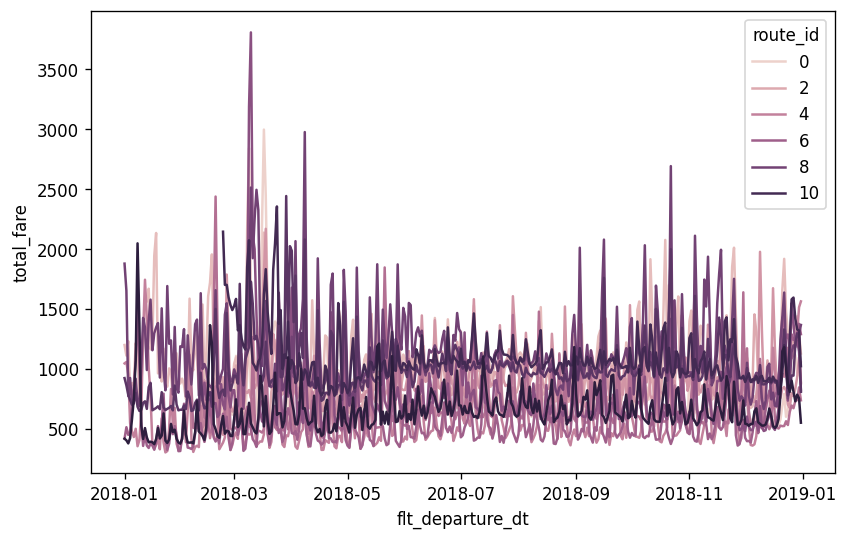

In [5]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.lineplot(
    data = processed_df.group_by('route_id', 'flt_departure_dt').agg(pl.col('total_fare').mean()), 
    x = "flt_departure_dt", 
    y = "total_fare", 
    hue = "route_id"
)

plt.show()

In [6]:
processed_df.filter(
    pl.col('tz_min').is_not_null()
).group_by('origin_id', 'is_dst').agg(pl.col('tz_min').unique())

origin_id,is_dst,tz_min
u8,i8,list[i16]
6,0,"[-360, -300]"
7,1,[-420]
6,1,[-300]
2,0,"[-360, -300]"
4,1,[-420]
5,0,[-360]
7,0,[-480]
1,1,[-240]
1,0,[-300]


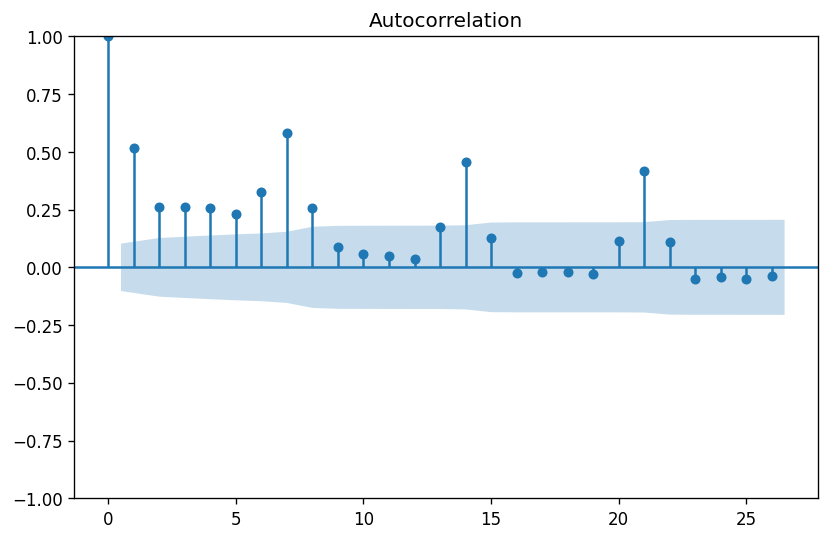

In [7]:
plt.figure(figsize = (8, 5), dpi = 120)
tsaplots.plot_acf(daily_mean_prices, ax = plt.gca())
plt.show()

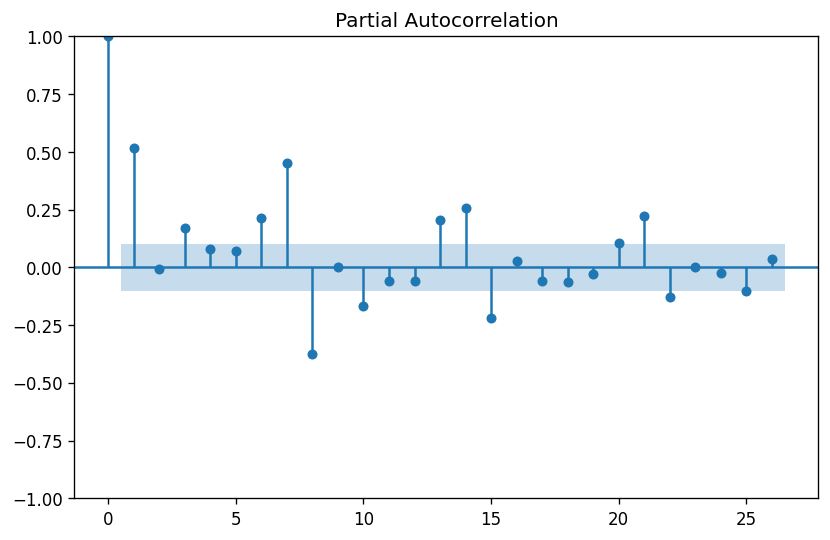

In [8]:
plt.figure(figsize = (8, 5), dpi = 120)
tsaplots.plot_pacf(daily_mean_prices, ax = plt.gca())
plt.show()